In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [2]:
def random_walk(steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    distance = np.zeros(steps)

    for i in range(1,steps):
        random_var = rand()
        if random_var < .25:
            x[i] = x[i-1]+1
            y[i] = y[i-1]
            continue
        if random_var < .5:
            x[i] = x[i-1]
            y[i] = y[i-1]+1
            continue
        if random_var < .75:
            x[i] = x[i-1]-1
            y[i] = y[i-1]
            continue
        x[i] = x[i-1]
        y[i] = y[i-1]-1
        
    distance = np.sqrt(np.power(x, 2) + np.power(y,2))
    return x,y, distance

In [3]:
def plot_walks(amount_plots, steps):
    for i in range(0, amount_plots):
        x, y, distance = random_walk(steps)
        plt.plot(x,y, alpha=.5)

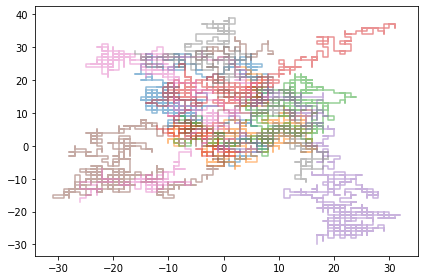

In [81]:
walks = 8
steps = 1000
plot_walks(walks, steps)
plt.tight_layout()
plt.savefig('build/many_walks.pdf')

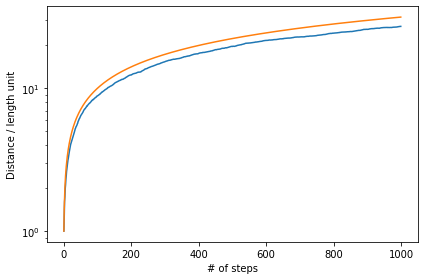

In [82]:
def distance_average(walks, steps):
    data = np.zeros((walks, steps))
    for i in range(0, walks):
        x,y, data[i, :] = random_walk(steps)
    average = np.mean(data, 0)
    return average

walks = 1000
steps = 1000
dist = distance_average(walks, steps)

t = np.arange(1,steps,1)
plt.plot(t, dist[1:])
plt.plot(t, np.sqrt(t))

plt.yscale('log')

plt.xlabel('# of steps')
plt.ylabel('Distance / length unit')
#plt.title(f'Distance averaged over {walks} walks')

plt.tight_layout()

plt.savefig('build/Steps-Distance.pdf')